## Multiple Additive Regression Trees (Gradient Boosting Trees)

In [ ]:
import pandas as pd

df = pd.read_excel("Concrete_Data.xls")
df.shape
data = df.drop(df.columns[8], axis=1)
target = df[df.columns[8]]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.to_numpy(), target.to_numpy(), random_state=0)

In [ ]:
# Testing maximum depth
depth = 1
depths = []
train_scores = []
test_scores = []
while depth < 10:
    gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.09, n_estimators=600, max_depth=depth)
    gbrt.fit(x_train, y_train)
    train_score = gbrt.score(x_train, y_train)
    test_score = gbrt.score(x_test, y_test)
    depths.append(depth)
    train_scores.append(train_score)
    test_scores.append(test_score)
    depth += 1

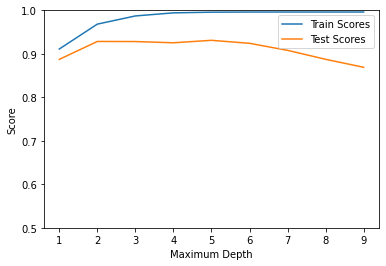

In [ ]:
# Vizualizing number of estimators
import matplotlib.pyplot as plt

plt.plot(depths, train_scores, label = "Train Scores")
plt.plot(depths, test_scores, label = "Test Scores")
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.ylim(0.5, 1)
plt.show()

In [ ]:
# Using optimized maximum depth
gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.09, n_estimators=600, max_depth=5)
gbrt.fit(x_train, y_train)
print("Train:", gbrt.score(x_train, y_train))
print("Test:", gbrt.score(x_test, y_test))

Train: 0.995806382880595
Test: 0.9311078922803171


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

gbrt_pred_test = gbrt.predict(x_test)

print("Test R2:", r2_score(y_test, gbrt_pred_test))
print("Test RMSE:", mean_squared_error(y_test, gbrt_pred_test), "MPa")
print("Test MAPE:", mean_absolute_percentage_error(y_test, gbrt_pred_test) * 100, "%")

Test R2: 0.9311078922803171
Test RMSE: 17.544587909760406 MPa
Test MAPE: 9.511367873483113 %


## Bagging Regressor Trees

In [ ]:
from sklearn.ensemble import BaggingRegressor

# Testing number of estimators
estimators = 50
num_estimators = []
train_scores = []
test_scores = []
while estimators < 500:
    brt = BaggingRegressor(random_state=0, n_estimators=estimators)
    brt.fit(x_train, y_train)
    train_score = brt.score(x_train, y_train)
    test_score = brt.score(x_test, y_test)
    num_estimators.append(estimators)
    train_scores.append(train_score)
    test_scores.append(test_score)
    estimators += 50

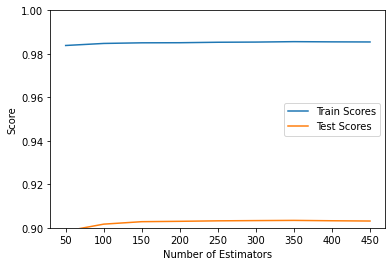

In [ ]:
# Vizualizing number of estimators
import matplotlib.pyplot as plt

plt.plot(num_estimators, train_scores, label = "Train Scores")
plt.plot(num_estimators, test_scores, label = "Test Scores")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.legend()
plt.ylim(0.9, 1)
plt.show()

In [ ]:
brt = BaggingRegressor(random_state=0, n_estimators=350)
brt.fit(x_train, y_train)

print("Train:", brt.score(x_train, y_train))
print("Test:", brt.score(x_test, y_test))

Train: 0.985609184182522
Test: 0.9034045028275949


In [ ]:
brt_pred_test = brt.predict(x_test)

print("Test R2:", r2_score(y_test, brt_pred_test))
print("Test RMSE:", mean_squared_error(y_test, brt_pred_test), "MPa")
print("Test MAPE:", mean_absolute_percentage_error(y_test, brt_pred_test) * 100, "%")

Test R2: 0.9034045028275949
Test RMSE: 24.59974368506772 MPa
Test MAPE: 12.62718836891848 %
